In [19]:
import numpy as np
window_size = 11
poly_order = 3
k = (window_size-1)//2
t  = np.arange(-k, k+1, 1)
A  = np.vander(t, poly_order +1, increasing =True)
A

array([[   1,   -5,   25, -125],
       [   1,   -4,   16,  -64],
       [   1,   -3,    9,  -27],
       [   1,   -2,    4,   -8],
       [   1,   -1,    1,   -1],
       [   1,    0,    0,    0],
       [   1,    1,    1,    1],
       [   1,    2,    4,    8],
       [   1,    3,    9,   27],
       [   1,    4,   16,   64],
       [   1,    5,   25,  125]])

In [20]:
c = np.linalg.pinv(A.T @ A) @ A.T
c.shape

(4, 11)

In [21]:
# Pad and convolve
def _apply_SG_filter(coeffs, x, window_size) -> np.ndarray:
    k = (window_size-1)//2
    x = np.pad(x, (k, k), mode ='edge')
    x = np.convolve(x, coeffs[::-1], mode ='valid' )
    return x

In [22]:
from scipy.signal import savgol_filter
from matplotlib import pyplot as plt
x  = np.random.rand(20) + np.random.normal(0, 1.5)

coeffs = c[0,:]
filtered_signal_2 = _apply_SG_filter(coeffs, x, window_size=11)
filtered_signal = savgol_filter(x, window_length=11, polyorder=3)

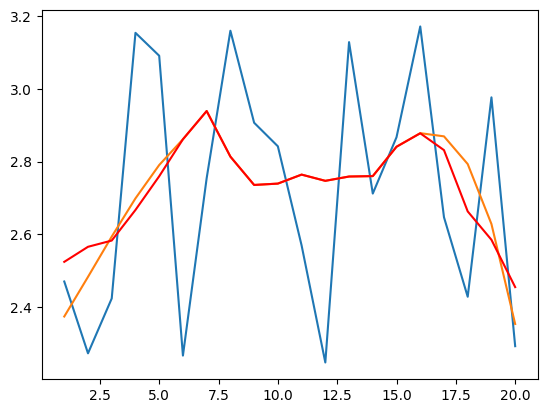

In [23]:
plt.plot(np.arange(1, len(x)+1), x)
plt.plot(np.arange(1, len(x)+1), filtered_signal)
plt.plot(np.arange(1, len(x)+1), filtered_signal_2, color = 'red')
plt.show()